# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [1]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

Load the `cardiac_ml_tools` module.

In [2]:
%run cardiac_ml_tools.py

In [17]:
import os
print("Current working directory:", os.getcwd())
print("Directory contents:", os.listdir())


Current working directory: C:\Users\siriv\cardiac_challenge\notebooks
Directory contents: ['.gitignore', '.ipynb_checkpoints', 'cardiac_ml_tools.py', 'ecg_dataset', 'intracardiac_dataset', 'task_1_getting_started.ipynb', 'task_2_getting_started.ipynb', 'task_3_getting_started.ipynb', 'task_4_getting_started.ipynb']


## Load the dataset

In [19]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='intracardiac_dataset/' # This should be the path to the intracardiac_dataset, it can be downloaded using data_science_challenge_2023/download_intracardiac_dataset.sh
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))

Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sort

## Dataset details

The dataset [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) 
consists of pairs of computationally simulated intracardiac transmembrane voltage recordings and ECG signals.
In total, 16140 organ-level simulations were conducted to create this dataset.
Simulations were performed using Lassen supercomputer at Lawrence Livermore National Lab (LLNL), concurrently utilizing 4 GPUs and 40 CPU cores.
Each simulation produced pairs of 500ms-by-10 raw electrode signals and 500ms-by-75 transmembrane voltage signals.
For convenience, we collect those signals in matrices and give them the following names:

Tensor | Description | Shape | Notes
--- | --- | --- | ---
$X$ | Row electrode signals | $10 \times 500$ | 10-lead ECG signals from the simulated torso (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$V$ | Activation map | $75 \times 500$ | Transmembrane voltage signals from the simulated heart (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$E$ | 12-lead ECG signals | $12 \times 500$ | 12-lead ECG signals obtained by `get_standard_leads`($X$)
$A$ | Activation map | $75 \times 1$ | Activation time, defined as $A_i = \text{min}_j(V_{ij})$

**IMPORTANT** : The raw data in the dataset consists of 10-lead ECG signals and 75-lead transmembrane voltage signals. The 12-lead ECG signals are obtained from the 10-lead ECG signals using the function `get_standard_leads` (in the file `cardiac_ml_tools.py`).

The overall generation process is shown in the following image. The ECG signal is recorded using 10 virtual electrodes and the transmembrane voltages are recorded at 75 points within the myocardium. The transmembrane voltages are then used to generate the spatio-temporal activation maps.

![ECG 10 2 12](../figures/data_generation.png)

## Getting the standard 12-lead ECG from the 10-lead ECG

The function `get_standard_leads` (in the file `cardiac_ml_tools.py`) is used to obtain the 12-lead ECG signals from the 10-lead ECG signals. It implements the following transformation, where the (Wilson Lead) is defined as $Vw = 1/3*(RA + LA + LL)$:
$$
\left\{
\begin{array}{lll}
    X_{:,1}  & \to  & RA \\
    X_{:,2}  & \to  & LA \\
    X_{:,3}  & \to  & LL \\
    X_{:,4}  & \to  & RL \\
    X_{:,5}  & \to  & V1 \\
    X_{:,6}  & \to  & V2 \\
    X_{:,7}  & \to  & V3 \\
    X_{:,8}  & \to  & V4 \\
    X_{:,9}  & \to  & V5 \\
    X_{:,10} & \to &  V6 \\
\end{array}
\right.
\text{        and        }
\left\{
\begin{array}{lll}          
\text{Lead } I& : & LA - RA \\
\text{Lead } II& : & LL - RA \\
\text{Lead } III& : & LL - LA \\
\text{Lead } aVR& : &  \frac{3}{2} (RA - Vw) \\
\text{Lead } aVL& : &  \frac{3}{2} (LA - Vw) \\
\text{Lead } aVF& : &  \frac{3}{2} (LL - Vw)\\ 
\text{Lead } V1 & : & V1 - Vw \\
\text{Lead } V2 & : & V2 - Vw \\
\text{Lead } V3 & : & V3 - Vw \\
\text{Lead } V4 & : & V4 - Vw \\
\text{Lead } V5 & : & V5 - Vw \\
\text{Lead } V6 & : & V6 - Vw \\
\end{array}
\right.
$$

Case 213 : intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy


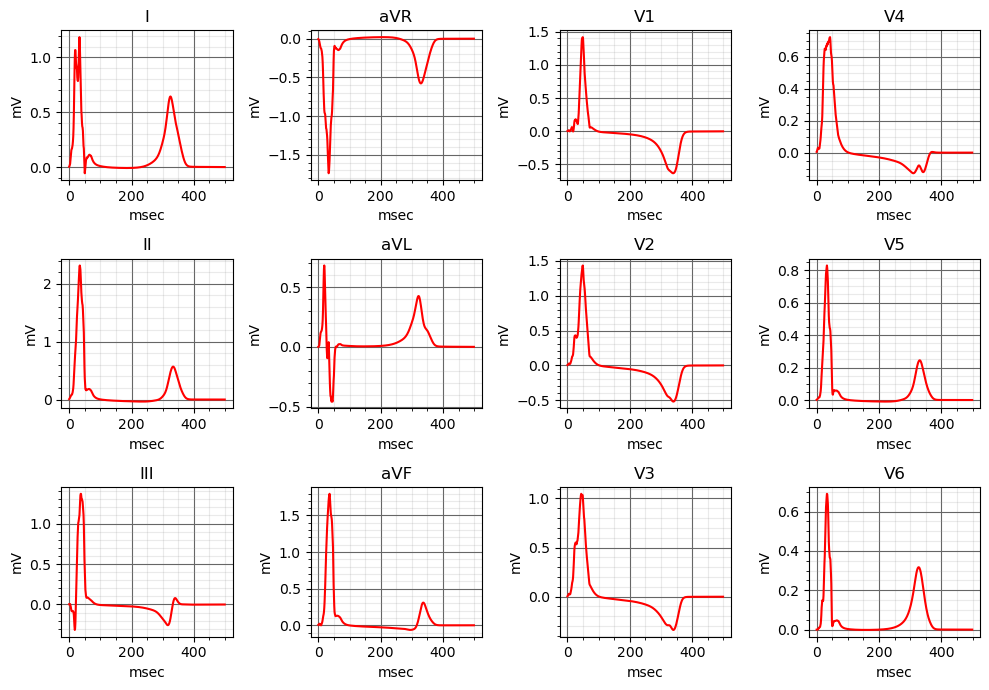

In [20]:
# Example of file pair
case = 213
# ECG plot
row = 3 
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

## Getting the activation map from the transmembrane voltages

The funtion `get_activation_map` (in the file `cardiac_ml_tools.py`) is used to obtain the activation map from the transmembrane voltages. It implements the following transformation $A_i = \text{min}_j(V_{ij})$.

Case 213 : intracardiac_dataset/data_hearts_dd_0p2\pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy


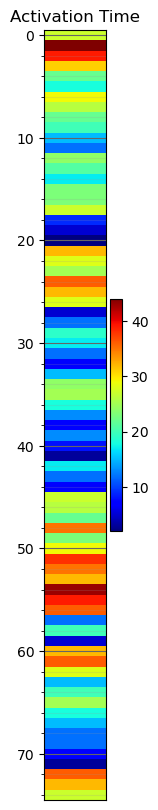

In [21]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


## Task 3: Learning the mapping from the 12-lead ECG to the activation map

Case 213 : ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy
Case 213 : ../intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


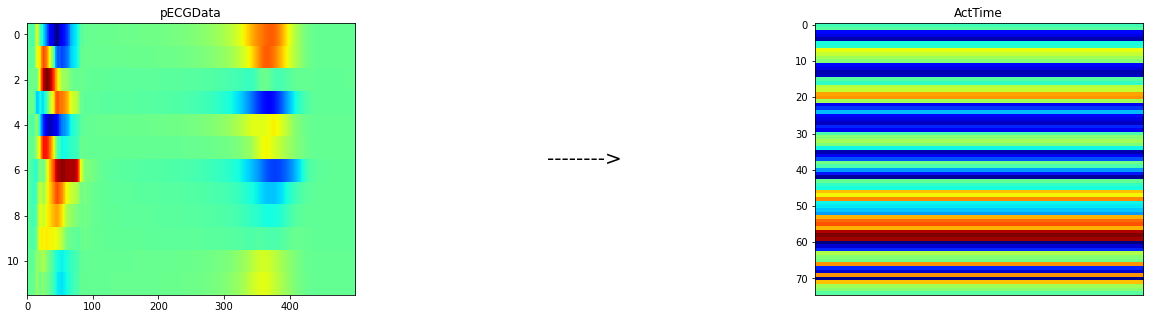

In [7]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(500, 12)),  # Define the input shape explicitly with the Input layer
    Conv1D(32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(700, activation='linear')  # Adjust this output layer to match your data
])

model.compile(optimizer='adam', loss='mse')


In [6]:
import os
import glob

# Change to match your actual folders
pECG_dir = "data/pECGData"
vm_dir = "data/VmData"

# List all .npy files
pECG_files = sorted(glob.glob(os.path.join(pECG_dir, "*.npy")))
vm_files = sorted(glob.glob(os.path.join(vm_dir, "*.npy")))

# Create file pairs
file_pairs = list(zip(pECG_files, vm_files))

print(f"Total file pairs found: {len(file_pairs)}")


Total file pairs found: 0


In [7]:
X = []
y = []

for ecg_path, vm_path in file_pairs:
    ecg = np.load(ecg_path)  # (timesteps, channels)
    ecg = get_standard_leads(ecg)  # (timesteps, 12)
    
    if ecg.shape[0] >= 500:
        ecg = ecg[:500, :]  # truncate to 500 timesteps
        act_time = get_activation_time(np.load(vm_path))  # shape: (75,)
        
        if act_time.shape[0] == 75:
            X.append(ecg)
            y.append(act_time)

X = np.array(X)  # shape: (samples, 500, 12)
y = np.array(y)  # shape: (samples, 75)

print(f'X shape: {X.shape}, y shape: {y.shape}')


X shape: (0,), y shape: (0,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = Sequential([
    Input(shape=(500, 12)),
    Conv1D(32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(75, activation='linear')  # Match the output shape of y
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 496, 32)             │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 248, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 244, 64)             │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 122, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 7808)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       1,999,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,030,635 (7.75 MB)

 Trainable params: 2,030,635 (7.75 MB)

 Non-trainable params: 0 (0.00 B)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2010.5914
Test Loss (MSE): 2095.2439
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


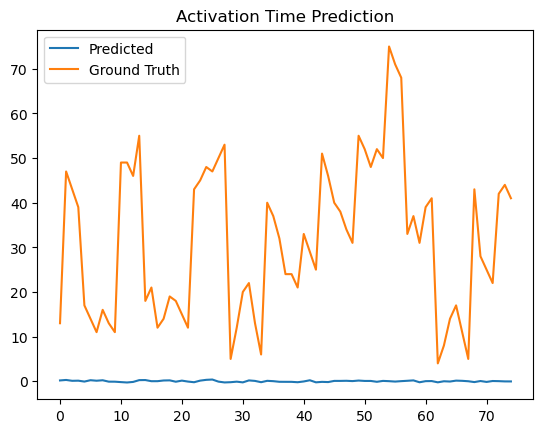

In [34]:
# Evaluate
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}')

# Predict
predictions = model.predict(X_test)

# Optional: Plot prediction vs ground truth
import matplotlib.pyplot as plt
plt.plot(predictions[0], label='Predicted')
plt.plot(y_test[0], label='Ground Truth')
plt.title("Activation Time Prediction")
plt.legend()
plt.show()


In [36]:
model.save('ecg_to_vm_model.keras')


In [20]:
from tensorflow.keras.models import load_model

model = load_model('ecg_to_vm_model.keras')


C:\Users\siriv\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import numpy as np

# Create a fake ECG: 12 leads, 1000 time points
ecg = np.random.rand(12, 1000)

# Save it as a .npy file
np.save('test_ecg.npy', ecg)


In [24]:
ecg = np.load('test_ecg.npy')
ecg_input = ecg.reshape(1, 12, -1)


In [25]:
from tensorflow.keras.models import load_model

model = load_model('ecg_to_vm_model.keras')


In [32]:
ecg_input = np.load('test_ecg.npy')  # shape (12, 1000)

# Reshape into (1, 500, 12)
# Assuming you want 500 time steps, you can cut or pad the signal
ecg_input = ecg_input[:, :500]  # If the length is more than 500, truncate to 500
ecg_input = ecg_input.reshape(1, 500, 12)  # shape (1, 500, 12)


In [33]:
prediction = model.predict(ecg_input)
print("Prediction shape:", prediction.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Prediction shape: (1, 75)


In [34]:
predicted_class = np.argmax(prediction, axis=-1)
print("Predicted Class:", predicted_class)


Predicted Class: [23]


In [35]:
class_mapping = {0: 'Normal', 1: 'Arrhythmia', 23: 'Class 23 Label'}  # Example, use your own mapping
print("Predicted Class:", class_mapping.get(predicted_class[0], "Unknown"))


Predicted Class: Class 23 Label


In [36]:
class_mapping = {
    0: 'Normal',
    1: 'Arrhythmia',
    23: 'Class 23 Label',  # Update this with actual meaning
    # Add other class mappings here
}
print(f"Predicted ECG Class: {class_mapping.get(predicted_class[0], 'Unknown')}")


Predicted ECG Class: Class 23 Label


In [37]:
true_class = 23  # Replace with the true label for the ECG data
accuracy = (predicted_class == true_class)
print(f"Prediction Accuracy: {accuracy}")


Prediction Accuracy: [ True]


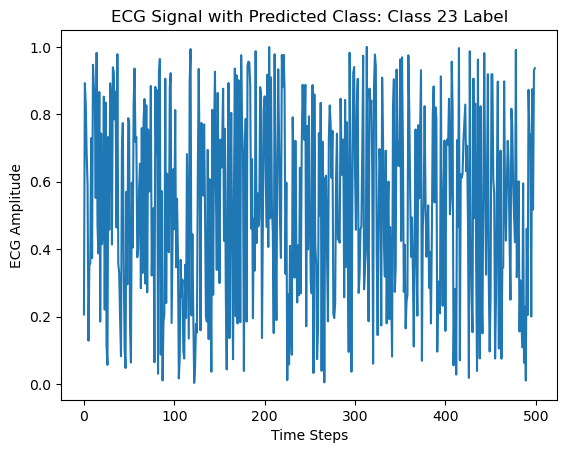

In [40]:
import matplotlib.pyplot as plt
plt.plot(ecg_input[0, :, 0])  # Plot the first lead (or any other lead)
plt.title(f"ECG Signal with Predicted Class: {class_mapping.get(predicted_class[0], 'Unknown')}")
plt.xlabel("Time Steps")
plt.ylabel("ECG Amplitude")
plt.show()


In [41]:
model.add(Dense(1, activation='sigmoid'))


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
prediction = model.predict(ecg_input)
predicted_class = 1 if prediction >= 0.5 else 0
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Predicted Class: 1


In [44]:
class_mapping = {0: 'Normal', 1: 'Arrhythmia'}
predicted_class_label = class_mapping.get(predicted_class, 'Unknown')
print(f"Predicted Class: {predicted_class_label}")


Predicted Class: Arrhythmia
